In [1]:
import numpy as np
from numpy.linalg import lstsq
import matplotlib.pyplot as plt

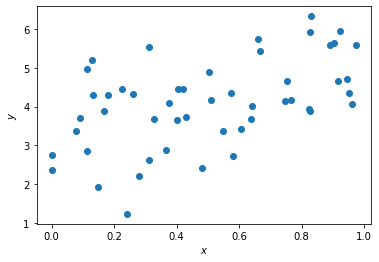

In [2]:
# Generate data
n_samples = 50
rng = np.random.default_rng()
x = rng.random(n_samples)
y = 2.0 * x + 3.0 + rng.standard_normal(n_samples)

plt.scatter(x,y)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [3]:
%time
bootstrap_betas = np.zeros((5000, 2))

for i in range(5000):
  idx = rng.integers(50, size=50)
  xnew = x[idx]
  ynew = y[idx]
  X = np.vstack((xnew, np.ones_like(xnew))).T
  slope, intercept = lstsq(X, ynew, rcond=None)[0]
  bootstrap_betas[i, :] = (slope, intercept)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


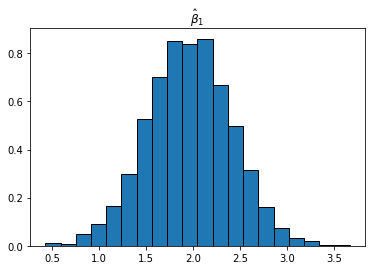

In [4]:
plt.hist(bootstrap_betas[:, 0], bins=20, edgecolor='k', density=True)
plt.title(r"$\hat \beta_1$");

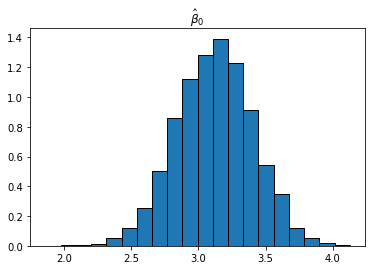

In [5]:
plt.hist(bootstrap_betas[:, 1], bins=20, edgecolor='k', density=True)
plt.title(r"$\hat \beta_0$");